In [26]:
import numpy as np
import random
import gym
from gym import wrappers
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


In [27]:
env = gym.make('FrozenLake-v0')
env = wrappers.Monitor(env, 'FrozenLake-record',force=True)

In [38]:
# Env variables
nb_states = 16
nb_actions = 4

y = .90
lr = .9
e = 1.0
e_decay = 0.999

#Loop Parameters
nb_max_episodes = 12000
episode_count = 0
total_steps = 0
test_freq = 50
log_freq = 500

In [39]:
x = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(x,W)

nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
update_model = trainer.minimize(loss)

In [40]:
def test_accurracy():
    test_batch_size = 200
    c = 0
    nb_success = 0.0
    while c < test_batch_size:
        is_gameover = False
        state = env.reset()
        while not is_gameover:
            Q1 = sess.run(Qout, feed_dict={x: np.identity(16)[state:state+1]})[0]
            action = np.argmax(Q1)
            next_state, reward, is_gameover, _ = env.step(action)
            state = next_state
        if reward == 1:
            nb_success += 1
        c += 1
    return nb_success / c

In [41]:
accurracies = []
rewards = []
import time, pickle, os
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    while episode_count < nb_max_episodes:
        state = env.reset()
        is_gameover = False
        reward_tot = 0
        episode_step = 0
        
        while not is_gameover:
            episode_step += 1

            # Eval current state
            Q1 = sess.run(Qout, feed_dict={x: np.identity(16)[state:state+1]})[0]
            
            if random.random() < e:
                action = random.randint(0, nb_actions-1)
            else:
                action = np.argmax(Q1)

            # Play best move with chance of random
            next_state, reward, is_gameover, _ = env.step(action)

            # Eval next state
            Q2 = sess.run(Qout, feed_dict={x: np.identity(16)[next_state:next_state+1]})[0]
            
            # Update first state evaluation
            Q1[action] += lr * (reward + y*np.max(Q2) - Q1[action])
            sess.run(update_model,feed_dict={x: np.identity(16)[state:state+1], nextQ:[Q1]})

            reward_tot += reward
            total_steps += 1
            state = next_state

            if is_gameover:
                break

        e *= e_decay

        if episode_count % test_freq == 0 and episode_count != 0:
            accurr = test_accurracy()
            accurracies.append(accurr)

            if episode_count % log_freq == 0:
                print('step: %s, episode: %s, accurracy: %s. random move probability: %s' % (total_steps, episode_count, accurr, e))

        episode_count += 1
        rewards.append(reward_tot)

  
    env.close()

step: 3711, episode: 500, accurracy: 0.13. random move probability: 0.6057725659163237
step: 9417, episode: 1000, accurracy: 0.475. random move probability: 0.36732772934619257
step: 16280, episode: 1500, accurracy: 0.555. random move probability: 0.22273980093919937
step: 25090, episode: 2000, accurracy: 0.195. random move probability: 0.13506472547210188
step: 34904, episode: 2500, accurracy: 0.625. random move probability: 0.08190040571973876
step: 46274, episode: 3000, accurracy: 0.38. random move probability: 0.049662681604038215
step: 58028, episode: 3500, accurracy: 0.63. random move probability: 0.030114404470033673
step: 70703, episode: 4000, accurracy: 0.375. random move probability: 0.018260740807661956
step: 84827, episode: 4500, accurracy: 0.675. random move probability: 0.011072928743333644
step: 96889, episode: 5000, accurracy: 0.345. random move probability: 0.006714390847905742
step: 110158, episode: 5500, accurracy: 0.345. random move probability: 0.004071465237738676

In [42]:
 with open("frozenLake_qTable.pkl", 'wb') as f:
        pickle.dump(Q2,f)  

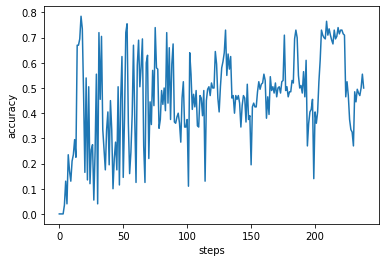

In [43]:
import matplotlib.pyplot as plt
plt.plot(accurracies)
plt.xlabel('steps')
plt.ylabel('accuracy')
plt.show()

# Env variables
nb_states = 16
nb_actions = 4

y = .90
lr = .85
e = 1.0
e_decay = 0.999

#Loop Parameters
nb_max_episodes = 8000
episode_count = 0
total_steps = 0
test_freq = 50
log_freq = 500

For this assignment , there are 16 states and 4 possible actions. Learning rate has been takes of 0.85 and e_day=0.999.

The model is trained on 8000 episodes with test_freq as 50.

Accuracy was lower in when the number of steps were low. As the steps has been increased the model accuracy has been improved considerably.However on some steps model accuracy has dropped but recovered soon on the next steps. The best accuracy has been around 75% for the proposed model.